In [8]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize 

In [9]:
#서울 공공데이터 포털(data.seoul.go.kr)에서 받은 인증키를 입력
mykey = '735859554f6f687435316f756f5562'

#데이터 기간 입력
#지하철 일간 데이터는 주중과 주말의 격차가 크므로, 요일을 맞춰주는 것이 필요
#2020년 1월 1일은 수요일, 2019년는 1월 2일이 첫번째 수요일
#2020년은 윤년이라 2월 29일이 존재, 비교년인 2019년의 end를 +1일
start_2020 = '20200101'
end_2020 = '20201031'
start_2019 = '20190102'
end_2019 = '20191102'

In [10]:
#2020년 데이터 부르기 (다 부르는데 시간이 걸려요)
dt_index = pd.date_range(start = start_2020, end = end_2020)
dt_list = dt_index.strftime("%Y%m%d").tolist()
df = pd.DataFrame({'DATE':[], 'RIDE_2020':[], 'ALIGHT_2020':[]})
j=1
for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/" + mykey + "/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    #pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df.loc[j] = [i, df_temp['RIDE_PASGR_NUM'].sum(), df_temp['ALIGHT_PASGR_NUM'].sum()]
    print(i,j) #진행 상황 표시용
    j=j+1

#2019년 데이터 부르기
dt_index = pd.date_range(start = start_2019, end= end_2019)
dt_list = dt_index.strftime("%Y%m%d").tolist()
df1 = pd.DataFrame({'DATE2':[], 'RIDE_2019':[], 'ALIGHT_2019':[]})
j=1
for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/" + mykey + "/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    #pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df1.loc[j] = [i, df_temp['RIDE_PASGR_NUM'].sum(), df_temp['ALIGHT_PASGR_NUM'].sum()]
    print(i,j) #진행 상황 표시용
    j=j+1

20200101 1
20200102 2
20200103 3
20200104 4
20200105 5
20200106 6
20200107 7
20200108 8
20200109 9
20200110 10
20200111 11
20200112 12
20200113 13
20200114 14
20200115 15
20200116 16
20200117 17
20200118 18
20200119 19
20200120 20
20200121 21
20200122 22
20200123 23
20200124 24
20200125 25
20200126 26
20200127 27
20200128 28
20200129 29
20200130 30
20200131 31
20200201 32
20200202 33
20200203 34
20200204 35
20200205 36
20200206 37
20200207 38
20200208 39
20200209 40
20200210 41
20200211 42
20200212 43
20200213 44
20200214 45
20200215 46
20200216 47
20200217 48
20200218 49
20200219 50
20200220 51
20200221 52
20200222 53
20200223 54
20200224 55
20200225 56
20200226 57
20200227 58
20200228 59
20200229 60
20200301 61
20200302 62
20200303 63
20200304 64
20200305 65
20200306 66
20200307 67
20200308 68
20200309 69
20200310 70
20200311 71
20200312 72
20200313 73
20200314 74
20200315 75
20200316 76
20200317 77
20200318 78
20200319 79
20200320 80
20200321 81
20200322 82
20200323 83
20200324 84
2

In [4]:
#2020년과 2019년 데이터를 하나의 데이터프레임으로 합치기
df_concat = pd.concat([df, df1], axis =1)

df_concat

NameError: name 'df' is not defined

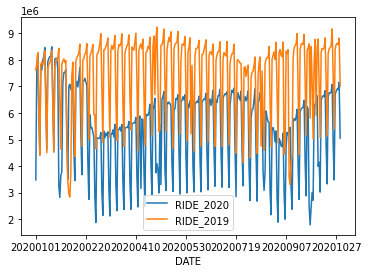

In [ ]:
#날짜를 인덱스로 만들고, 날짜를 x축으로 그래프 그리기
df_concat.set_index('DATE')
df_concat.plot('DATE', ['RIDE_2020', 'RIDE_2019'])

In [ ]:
#[부록] 데이터 결과를 파일로 저장하기 위해서 구글 드라이브 마운트
from google.colab import drive
drive.mount('/data/')

Mounted at /data/


In [ ]:
#[부록] 마운트 후에 데이터를 엑셀파일로 저장 -> 구글드라이브에서 PC로 다운로드
df_concat.to_excel('C:\Users\user7\Desktop\21Bigdata\2020-11_seoul_subway.xls')

### 요약
- urllib.request.urlopen(url) : 공공데이터 포털에서 데이터 가져오기
- json_normalize(): JSON 데이터 DataFrame으로 전환
- df_concat.plot : 그래프로 표시

In [ ]:
2020 gunn.kim https://gunn.kim